<a href="https://colab.research.google.com/github/suriya3153/customer-segmentation/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
df=pd.read_csv("/content/drive/MyDrive/pro/data.csv",encoding= 'unicode_escape')

In [6]:
df.Description.nunique()

4223

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [8]:
df.shape

(541909, 8)

In [9]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [10]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [11]:
df.Description

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
541904            PACK OF 20 SPACEBOY NAPKINS
541905           CHILDREN'S APRON DOLLY GIRL 
541906          CHILDRENS CUTLERY DOLLY GIRL 
541907        CHILDRENS CUTLERY CIRCUS PARADE
541908          BAKING SET 9 PIECE RETROSPOT 
Name: Description, Length: 541909, dtype: object

In [12]:
df1=df.drop(columns=["InvoiceNo"])

In [13]:
df1.Country.value_counts()

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [14]:
df1=df1[~df1.Description.duplicated()]

In [15]:
df1=df1[~df1.Description.isnull()]

In [16]:
df1.shape

(4223, 7)

### remove stopwords

In [17]:
orgine=df1.Description.copy()

In [18]:
df1.Description=df1.Description.str.replace("[^a-zA-Z0-9]", " ")

<ipython-input-18-2a04ffee61a9>:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df1.Description=df1.Description.str.replace("[^a-zA-Z0-9]", " ")


In [19]:
df1.Description

0          WHITE HANGING HEART T LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART 
                         ...                 
535327                            damages    
535329                               mixed up
535335                                   lost
537621     CREAM HANGING HEART T LIGHT HOLDER
540421            PAPER CRAFT   LITTLE BIRDIE
Name: Description, Length: 4223, dtype: object

### change lowercase

In [20]:
df1.Description=df1.Description.str.lower()

### Replacing short words

In [21]:
df1.Description=df1.Description.apply(lambda row:" ".join([i for i in str(row).split() if len(i)>2]))

In [22]:
df1.Description

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 4223, dtype: object

### Remove stop words

In [23]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk import word_tokenize

stop_words = stopwords.words('english')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [24]:
def remove_stopwords(rev):
    # iNPUT : IT WILL TAKE ROW/REVIEW AS AN INPUT
    # take the paragraph, break into words, check if the word is a stop word, remove if stop word, combine the words into a para again
    review_tokenized = word_tokenize(rev)
    rev_new = " ".join([i for i in review_tokenized  if i not in stop_words])
    return rev_new

In [25]:
df1['Description'] = [remove_stopwords(r) for r in df1['Description']]

In [26]:
df1['Description']

0            white hanging heart light holder
1                         white metal lantern
2              cream cupid hearts coat hanger
3         knitted union flag hot water bottle
4               red woolly hottie white heart
                         ...                 
535327                                damages
535329                                  mixed
535335                                   lost
537621       cream hanging heart light holder
540421              paper craft little birdie
Name: Description, Length: 4223, dtype: object

In [27]:
### Lemmatization

In [28]:
# Begin Lemmatization 
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# function to convert nltk tag to wordnet tag
lemmatizer = WordNetLemmatizer()

# Finds the part of speech tag
# Convert the detailed POS tag into a shallow information
def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:          
        return None

# lemmatize sentence using pos tag
def lemmatize_sentence(sentence):
  # word tokenize -> pos tag (detailed) -> wordnet tag (shallow pos) -> lemmatizer -> root word
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:        
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)


df1['Description'] = df1['Description'].apply(lambda x: lemmatize_sentence(x))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [29]:
df1['Description'] 

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
535327                              damage
535329                               mixed
535335                                lose
537621       cream hang heart light holder
540421           paper craft little birdie
Name: Description, Length: 4223, dtype: object

In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(max_features=2500) # Intialise the model 
values = tfidf_vectorizer.fit_transform(df1['Description'] )

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
x=pd.DataFrame(values.toarray(), columns = feature_names)


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [31]:
x

,100,120cm,125g,15c,15cm,16954,16955,16956,16957,16960,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [32]:
orgine

0          WHITE HANGING HEART T-LIGHT HOLDER
1                         WHITE METAL LANTERN
2              CREAM CUPID HEARTS COAT HANGER
3         KNITTED UNION FLAG HOT WATER BOTTLE
4              RED WOOLLY HOTTIE WHITE HEART.
                         ...                 
535327                        ????damages????
535329                               mixed up
535335                                   lost
537621     CREAM HANGING HEART T-LIGHT HOLDER
540421            PAPER CRAFT , LITTLE BIRDIE
Name: Description, Length: 4223, dtype: object

In [33]:
df1['Description']

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
535327                              damage
535329                               mixed
535335                                lose
537621       cream hang heart light holder
540421           paper craft little birdie
Name: Description, Length: 4223, dtype: object

In [34]:
dicofval={}
for key,val in zip(orgine,df1['Description']):
  dicofval["{}".format(key)]=val

In [35]:
dicofval

{'WHITE HANGING HEART T-LIGHT HOLDER': 'white hang heart light holder',
 'WHITE METAL LANTERN': 'white metal lantern',
 'CREAM CUPID HEARTS COAT HANGER': 'cream cupid heart coat hanger',
 'KNITTED UNION FLAG HOT WATER BOTTLE': 'knit union flag hot water bottle',
 'RED WOOLLY HOTTIE WHITE HEART.': 'red woolly hottie white heart',
 'SET 7 BABUSHKA NESTING BOXES': 'set babushka nesting box',
 'GLASS STAR FROSTED T-LIGHT HOLDER': 'glass star frost light holder',
 'HAND WARMER UNION JACK': 'hand warmer union jack',
 'HAND WARMER RED POLKA DOT': 'hand warmer red polka dot',
 'ASSORTED COLOUR BIRD ORNAMENT': 'assort colour bird ornament',
 "POPPY'S PLAYHOUSE BEDROOM ": 'poppy playhouse bedroom',
 "POPPY'S PLAYHOUSE KITCHEN": 'poppy playhouse kitchen',
 'FELTCRAFT PRINCESS CHARLOTTE DOLL': 'feltcraft princess charlotte doll',
 'IVORY KNITTED MUG COSY ': 'ivory knit mug cosy',
 'BOX OF 6 ASSORTED COLOUR TEASPOONS': 'box assort colour teaspoon',
 'BOX OF VINTAGE JIGSAW BLOCKS ': 'box vintage jig

In [36]:
df=df[~df.Description.isnull()]

In [37]:
df2=df.drop(columns=["InvoiceNo"])

In [38]:
df2

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
541904,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [39]:
df2.Description=df2.Description.replace(dicofval)

In [40]:
df2.Description

0            white hang heart light holder
1                      white metal lantern
2            cream cupid heart coat hanger
3         knit union flag hot water bottle
4            red woolly hottie white heart
                        ...               
541904                pack spaceboy napkin
541905              child apron dolly girl
541906        childrens cutlery dolly girl
541907     childrens cutlery circus parade
541908            bake set piece retrospot
Name: Description, Length: 540455, dtype: object

In [41]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vectorizer = TfidfVectorizer(max_features=2500) # Intialise the model 
values = tfidf_vectorizer.fit_transform(df1['Description'] )

# Show the Model as a pandas DataFrame
feature_names = tfidf_vectorizer.get_feature_names()
x=pd.DataFrame(values.toarray(), columns = feature_names)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [42]:
x

,100,120cm,125g,15c,15cm,16954,16955,16956,16957,16960,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
x.to_csv("openss.csv",index=False)

In [44]:
x

,100,120cm,125g,15c,15cm,16954,16955,16956,16957,16960,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
x=pd.read_csv("openss.csv")

In [46]:
from sklearn.cluster import KMeans

In [47]:
sse={1: 8247519.000000001,
 2: 8238598.761057356,
 3: 8223158.8793563545,
 4: 8216589.364544644,
 5: 8211851.46289533,
 6: 8205192.197251509,
 7: 8174951.564394,
 8: 8183051.608746382,
 9: 8186745.417281279,
 10: 8165216.23020286,
 11: 8153085.927194398,
 12: 8137518.279884037,
 13: 8145569.713747788,
 14: 8134553.101179156,
 15: 8129750.863472874,
 16: 8113574.045506729,
 17: 8105039.310384418,
 18: 8096019.782412646,
 19: 8091924.100880742,
 20: 8084246.959212666,
 21: 8068617.877918111,
 22: 8055992.739630141,
 23: 8057754.250089721,
 24: 8048089.333725609,
 25: 8034713.887638049,
 26: 8012672.101179292,
 27: 8007162.3428789675,
 28: 7992271.706174618,
 29: 7997411.499861939,
 30: 7993896.160971204,
 31: 7977841.499384607,
 32: 7948529.044239892,
 33: 7971602.415441111,
 34: 7963259.045730943,
 35: 7934845.70952957,
 36: 7928647.134589167,
 37: 7937180.956829922,
 38: 7911218.887863966,
 39: 7929905.557731747,
 40: 7907957.496026092,
 41: 7879625.351110838,
 42: 7883132.7610228155,
 43: 7884827.344263416,
 44: 7855874.025665311,
 45: 7870748.997040095,
 46: 7846760.466042032,
 47: 7837689.084458503,
 48: 7815992.914597879,
 49: 7840150.215131969,
 50: 7820427.188925173,
 51: 7813159.663534634,
 52: 7806366.022132026,
 53: 7806901.12742158,
 54: 7799336.549432823,
 55: 7767498.371659692,
 56: 7744413.0194132915,
 57: 7749602.775085174,
 58: 7740255.493374158,
 59: 7735054.2900608145,
 60: 7719889.22734407,
 61: 7728574.621676298,
 62: 7716284.095314072,
 63: 7696469.954251717,
 64: 7683668.6887639295,
 65: 7690989.799093796,
 66: 7656766.365399979,
 67: 7658874.259728055,
 68: 7656926.996552918,
 69: 7625137.494880303,
 70: 7623813.411841601,
 71: 7641841.328945415,
 72: 7599098.853294781,
 73: 7606179.229392053,
 74: 7608189.630968155,
 75: 7600049.165750221,
 76: 7589369.248010343,
 77: 7586932.178768968,
 78: 7584737.225534704,
 79: 7570949.073246028,
 80: 7542781.29134612,
 81: 7530004.054615419,
 82: 7527676.118332797,
 83: 7532371.349893317,
 84: 7522482.59977329,
 85: 7509905.35420789,
 86: 7494337.450107096,
 87: 7495527.663687851,
 88: 7485617.855023077,
 89: 7502837.116454359,
 90: 7468839.259745021,
 91: 7461087.108644869,
 92: 7450067.826362593,
 93: 7461060.516209777,
 94: 7438123.610929873,
 95: 7404899.542135838,
 96: 7423424.48102208,
 97: 7425911.646150409,
 98: 7402416.052684858,
 99: 7398963.258069343,
 100: 7394332.43982927,
 101: 7401860.032922123,
 102: 7374195.317298725,
 103: 7359561.949948633,
 104: 7383296.699062318,
 105: 7355505.728454085,
 106: 7360928.896999524,
 107: 7348258.374789691,
 108: 7327745.512624604,
 109: 7322029.967513658,
 110: 7315183.556101054,
 111: 7270124.121954095,
 112: 7298773.577228496,
 113: 7285410.93157875,
 114: 7262506.308305481,
 115: 7273089.580553655,
 116: 7262846.06568109,
 117: 7253387.383337146,
 118: 7261950.286960743,
 119: 7218958.23042958,
 120: 7230248.282038033,
 121: 7239119.190653988,
 122: 7209415.306185385,
 123: 7203184.634152272,
 124: 7220588.445883289,
 125: 7191657.253598096,
 126: 7188549.293741079,
 127: 7183814.442502073,
 128: 7171681.7464516405,
 129: 7172493.851750873,
 130: 7145462.511257378,
 131: 7129563.533757416,
 132: 7113765.055890401,
 133: 7134526.481987237,
 134: 7115013.636231786,
 135: 7111796.047585453,
 136: 7130603.189033672,
 137: 7107186.124699809,
 138: 7087850.2082619,
 139: 7080310.8301186,
 140: 7083170.896586473,
 141: 7072494.1333393585,
 142: 7050898.663218566,
 143: 7031734.041360219,
 144: 7041432.684082929,
 145: 7050711.12100099,
 146: 7041698.112169396,
 147: 7037077.589795889,
 148: 7028630.74268723,
 149: 6974685.252169477,
 150: 6981179.477687707,
 151: 6969978.966251915,
 152: 6974586.447338618,
 153: 6961115.899954466,
 154: 6947404.963075194,
 155: 6937869.732383259,
 156: 6929256.764776899,
 157: 6924854.260000198,
 158: 6926010.739998638,
 159: 6920639.41233225,
 160: 6905593.6357712075,
 161: 6905441.933529938,
 162: 6884483.551535921,
 163: 6877269.507236724,
 164: 6883950.450874256,
 165: 6866703.093352087,
 166: 6863519.9598651305,
 167: 6840097.223640908,
 168: 6843975.764329029,
 169: 6845415.792424705,
 170: 6828828.850383826,
 171: 6816727.801752107,
 172: 6821112.244211014,
 173: 6811230.8397736475,
 174: 6783143.407139644,
 175: 6807278.356218924,
 176: 6794752.922800947,
 177: 6781223.594388304,
 178: 6778629.145179345,
 179: 6770952.911381861,
 180: 6745578.599032037,
 181: 6757217.333199914,
 182: 6735726.355155272,
 183: 6719556.289517845,
 184: 6720162.9970536325,
 185: 6718311.369145917,
 186: 6712785.81779317,
 187: 6701570.326506816,
 188: 6707961.217735231,
 189: 6691713.17699421,
 190: 6692614.598407168,
 191: 6678163.265363794,
 192: 6654287.99535074,
 193: 6667413.774582099,
 194: 6661859.403825295,
 195: 6649498.874901617,
 196: 6635968.659875015,
 197: 6626817.711177669,
 198: 6632391.327851019,
 199: 6626761.531852135,
 200: 6615376.818741126,
 201: 6597840.339620486,
 202: 6612953.386067187,
 203: 6595851.965361694,
 204: 6580216.78184791,
 205: 6582717.155956581,
 206: 6561714.94058392,
 207: 6564554.689761709,
 208: 6564583.574127138,
 209: 6542223.148858839,
 210: 6542355.681687579,
 211: 6539293.876857078,
 212: 6535353.819976274,
 213: 6527654.2391197,
 214: 6508563.425124913,
 215: 6514707.139375807,
 216: 6500373.415424232,
 217: 6489594.746812129,
 218: 6475067.642214144,
 219: 6487292.228070842,
 220: 6458985.581933144,
 221: 6455223.989927724,
 222: 6436682.2099385215,
 223: 6449654.853573636,
 224: 6444778.260024671,
 225: 6438084.542823865,
 226: 6422425.53641059,
 227: 6413441.81517639,
 228: 6400997.368943755,
 229: 6386189.070553325,
 230: 6399693.362542732,
 231: 6401181.313513768,
 232: 6381916.656105322,
 233: 6383085.432526372,
 234: 6360064.296867505,
 235: 6361746.27395118,
 236: 6355921.3256659005,
 237: 6352847.71034909,
 238: 6341804.068098545,
 239: 6343820.601663504,
 240: 6319642.3433883665,
 241: 6321106.61657874,
 242: 6312124.524228388,
 243: 6312448.481016623,
 244: 6307968.302029574,
 245: 6293231.532410384,
 246: 6291363.063308004,
 247: 6281209.316354359,
 248: 6264729.201064908,
 249: 6265276.020444453,
 250: 6251452.212977154,
 251: 6258400.331550332,
 252: 6245599.581529643,
 253: 6235871.029756014,
 254: 6231235.204591295,
 255: 6245825.829450302,
 256: 6212471.5561060645,
 257: 6207463.8919601925,
 258: 6203480.137910459,
 259: 6191524.74219686,
 260: 6187154.996197275,
 261: 6193593.680548163,
 262: 6175364.367740076,
 263: 6159432.4068631,
 264: 6169062.892477734,
 265: 6159824.2641555425,
 266: 6161316.909677127,
 267: 6155821.40646813,
 268: 6127086.859580967,
 269: 6131132.443535984,
 270: 6112250.225089917,
 271: 6129231.123029202,
 272: 6100743.377768094,
 273: 6101031.496685473,
 274: 6099142.314950918,
 275: 6096334.894920975,
 276: 6084201.531940002,
 277: 6074208.8962212,
 278: 6077548.225974418,
 279: 6074055.463323675,
 280: 6044843.9423298845,
 281: 6060846.479561505,
 282: 6037854.431530762,
 283: 6041693.40253643,
 284: 6029448.687776547,
 285: 6018090.240871321,
 286: 6016808.644301615,
 287: 6014345.458149865,
 288: 6010953.738136537,
 289: 5993837.5073254835,
 290: 6000830.750239613,
 291: 5981423.678628439,
 292: 5969844.8736084215,
 293: 5955747.949267168,
 294: 5975160.539553473,
 295: 5961290.637421503,
 296: 5964251.5890228655,
 297: 5940871.848313088,
 298: 5947624.754471165,
 299: 5940153.598130418,
 300: 5930245.302796142,
 301: 5923176.928338931,
 302: 5921777.2492253855,
 303: 5897799.840247067,
 304: 5909122.042837096,
 305: 5906361.163871542,
 306: 5881433.561935418,
 307: 5885836.062901968,
 308: 5875776.191448877,
 309: 5874661.222903626,
 310: 5867256.271878667,
 311: 5859760.05719578,
 312: 5856524.888787956,
 313: 5848919.739648754,
 314: 5841774.870621843,
 315: 5838401.332742179,
 316: 5824479.896187315,
 317: 5838150.86359793,
 318: 5807866.1446956415,
 319: 5809279.801155449,
 320: 5799437.7932516355,
 321: 5781742.953097938,
 322: 5789792.588350546,
 323: 5804805.062760691,
 324: 5779446.723337635,
 325: 5767347.056420637,
 326: 5767089.995404828,
 327: 5743550.518063462,
 328: 5759542.831485098,
 329: 5744296.123427274,
 330: 5740016.6880433615,
 331: 5724709.820547437,
 332: 5722328.027597965,
 333: 5732951.914747532,
 334: 5713580.969530508,
 335: 5719277.9109000545,
 336: 5713516.759859523,
 337: 5697377.274445949,
 338: 5694502.630820153,
 339: 5680450.812155841,
 340: 5677620.296508325,
 341: 5670035.299484961,
 342: 5659426.405752942,
 343: 5641817.286071653,
 344: 5648530.469618069,
 345: 5654446.4796764515,
 346: 5643727.475237523,
 347: 5635290.973310853,
 348: 5626657.461216424,
 349: 5619632.673705643,
 350: 5621158.199169079,
 351: 5623049.93608113,
 352: 5606985.05972557,
 353: 5594920.004576763,
 354: 5596693.065744746,
 355: 5570548.042229319,
 356: 5582760.745504305,
 357: 5573460.648883935,
 358: 5570617.764847927,
 359: 5566938.220972514}

In [48]:
import plotly.express as px
ssd=sorted(sse.values(),reverse=True)
s=sorted(sse)
px.line(x=s,y=ssd)

In [49]:
km = KMeans(356)
km.fit(x)


KMeans(n_clusters=356)

In [50]:
y=km.predict(x)

In [51]:
x["cluster"]=y

In [52]:
x

,100,120cm,125g,15c,15cm,16954,16955,16956,16957,16960,...,wreath,wreck,write,wrong,wrongly,xmas,yellow,yuletide,zero,zinc
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4218,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4221,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
lisd={}
for val,nan in zip(df1.Description,y):
  lisd[val]=nan

In [54]:
lisd

{'white hang heart light holder': 106,
 'white metal lantern': 30,
 'cream cupid heart coat hanger': 0,
 'knit union flag hot water bottle': 64,
 'red woolly hottie white heart': 0,
 'set babushka nesting box': 325,
 'glass star frost light holder': 205,
 'hand warmer union jack': 161,
 'hand warmer red polka dot': 161,
 'assort colour bird ornament': 306,
 'poppy playhouse bedroom': 154,
 'poppy playhouse kitchen': 154,
 'feltcraft princess charlotte doll': 36,
 'ivory knit mug cosy': 196,
 'box assort colour teaspoon': 306,
 'box vintage jigsaw block': 219,
 'box vintage alphabet block': 327,
 'home building block word': 182,
 'love building block word': 182,
 'recipe box metal heart': 30,
 'doormat new england': 105,
 'jam making set jar': 215,
 'red coat rack paris fashion': 349,
 'yellow coat rack paris fashion': 349,
 'blue coat rack paris fashion': 349,
 'bath building block word': 182,
 'alarm clock bakelike pink': 69,
 'alarm clock bakelike red': 69,
 'alarm clock bakelike gre

In [55]:
df1

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,85123A,white hang heart light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,84406B,cream cupid heart coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,84029G,knit union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...
535327,85104,damage,-355,12/7/2011 18:32,0.00,NaN,United Kingdom
535329,21693,mixed,-87,12/7/2011 18:34,0.00,NaN,United Kingdom
535335,22578,lose,-1050,12/7/2011 18:38,0.00,NaN,United Kingdom
537621,85123A,cream hang heart light holder,4,12/8/2011 12:07,2.95,17841.0,United Kingdom


In [56]:
df2["predict"]=df2.Description.replace(lisd)

In [57]:
groupofpr=df2.groupby(["predict"])

In [58]:
groupofpr.Description.agg("count")

predict
0      17705
1       1806
2        421
3       1785
4         60
       ...  
351       68
352     2218
353     1362
354     1920
355     1167
Name: Description, Length: 356, dtype: int64

### we will use frequence conut method

In [59]:
df2

,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,predict
0,85123A,white hang heart light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,106
1,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,30
2,84406B,cream cupid heart coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,0
3,84029G,knit union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,64
4,84029E,red woolly hottie white heart,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,0
...,...,...,...,...,...,...,...,...
541904,22613,pack spaceboy napkin,12,12/9/2011 12:50,0.85,12680.0,France,89
541905,22899,child apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France,332
541906,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France,159
541907,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France,91


In [62]:
x=df2[["predict"]]

In [63]:
x

,predict
0,106
1,30
2,0
3,64
4,0
...,...
541904,89
541905,332
541906,159
541907,91


In [68]:
x["Description"]=df2.Description.replace(df2.Description.value_counts().to_dict())

<ipython-input-68-06c43934aab1>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
x


,predict,Description
0,106,2369
1,30,328
2,0,293
3,64,473
4,0,449
...,...,...
541904,89,148
541905,332,320
541906,159,307
541907,91,162


In [80]:

from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
x["InvoiceDate"]=encoder.fit_transform(df2["InvoiceDate"])
x["CustomerID"]=encoder.fit_transform(df2["CustomerID"])
x["Country"]=encoder.fit_transform(df2["Country"])
x["StockCode"]=encoder.fit_transform(df2["StockCode"])
x["Quantity"]=df2["Quantity"]

<ipython-input-80-613ae5a57f0e>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-613ae5a57f0e>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-613ae5a57f0e>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-80-613ae5a

In [81]:
x

,predict,Description,InvoiceDate,CustomerID,Country,StockCode,Quantity
0,106,2369,6660,4048,36,3438,6
1,30,328,6660,4048,36,2739,6
2,0,293,6660,4048,36,2975,8
3,64,473,6660,4048,36,2919,6
4,0,449,6660,4048,36,2918,6
...,...,...,...,...,...,...,...
541904,89,148,9141,275,13,1492,12
541905,332,320,9141,275,13,1768,6
541906,159,307,9141,275,13,2110,4
541907,91,162,9141,275,13,2111,4


In [82]:
x.dtypes

predict        int32
Description    int64
InvoiceDate    int64
CustomerID     int64
Country        int64
StockCode      int64
Quantity       int64
dtype: object

In [86]:
from sklearn.preprocessing import StandardScaler

# Load the data
X = x

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the data
scaler.fit(X)

# Transform the data
X_scaled = scaler.transform(X)

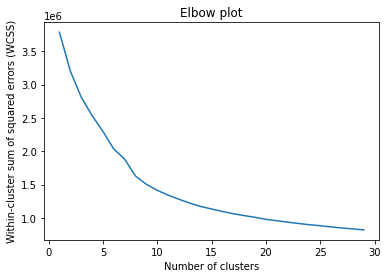

In [89]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the data
X = X_scaled

# Create an empty list to store the within-cluster sum of squared errors (WCSS) for each number of clusters
wcss = []

# Loop over a range of number of clusters
for i in range(1, 30):
  # Create a KMeans model with the specified number of clusters
  kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
  # Fit the model to the data
  kmeans.fit(X)
  # Append the WCSS for this model to the list
  wcss.append(kmeans.inertia_)

# Plot the WCSS versus the number of clusters
plt.plot(range(1, 30), wcss)
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squared errors (WCSS)')
plt.show()


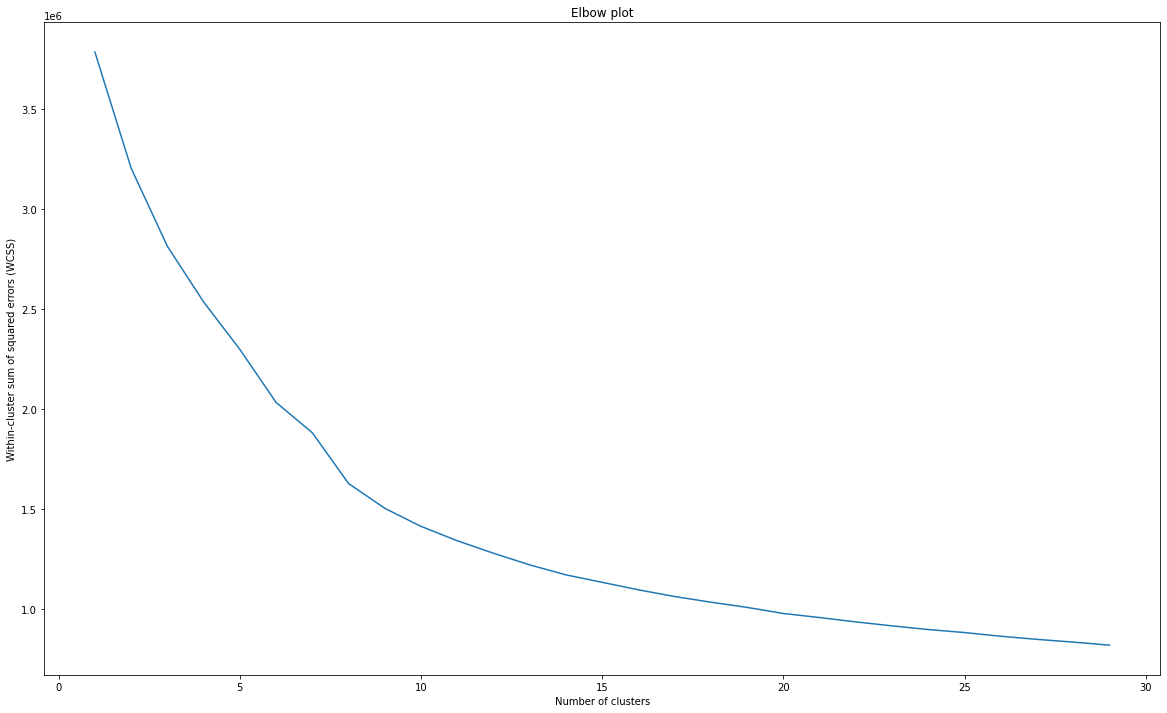

In [91]:
plt.figure(figsize=(20, 12))
plt.plot(range(1, 30), wcss)
plt.title('Elbow plot')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squared errors (WCSS)')
plt.show()

In [92]:
import plotly.express as px

# Load the data


# Create a line plot
fig = px.line(x=range(1, 30), y=wcss, title='Elbow plot', labels={'x': 'Number of clusters', 'y': 'Within-cluster sum of squared errors (WCSS)'})

# Show the plot
fig.show()

### number of clusters is 8

In [93]:
kmeans = KMeans(n_clusters=8, init='k-means++', random_state=0)

In [96]:
kmeans.fit(X_scaled)

KMeans(random_state=0)

In [98]:
pred=kmeans.predict(X_scaled)